In [1]:
%matplotlib inline
import numpy as np
from utils import readResult

In [2]:
s0pl, s0pv = readResult("SVMModel-random-0")

In [4]:
from utils import readOracle

In [5]:
ol = readOracle()

In [6]:
len(ol)

37786

In [8]:
from utils import score
score(ol, s0pl)

(0.96496056740591751,
 0.9435502153706643,
 0.90972677595628415,
 0.9263298464277766)

In [ ]:
sr2500pl, sr2500pv = readResult("svm-random-2500")
sr5000pl, sr5000pv = readResult("svm-random-5000")
sr7500pl, sr7500pv = readResult("svm-random-7500")
sr10000pl, sr10000pv = readResult("svm-random-10000")

In [ ]:
len(sr2500pl), len(sr5000pl), len(sr7500pl), len(sr10000pl)

In [ ]:
sc2500pl, sc2500pv = readResult("svm-class-2500")
sc5000pl, sc5000pv = readResult("svm-class-2500")
sc7500pl, sc7500pv = readResult("svm-class-2500")
sc10000pl,sc10000pv = readResult("svm-class-2500")

In [ ]:
len(sc2500pl), len(sc5000pl), len(sc7500pl), len(sc10000pl)

In [103]:
rand_res = [readResult("svm-random-{}".format(num)) for num in [2500, 5000, 7500, 10000]]

In [104]:
class_res = [readResult("svm-class-{}".format(num)) for num in [2500, 5000, 7500, 10000]]

In [127]:
for rr in rand_res:
    print(score(ol, rr[0]))

(0.9591912348488858, 0.91329856584093871, 0.91868852459016392, 0.91598561621444918)
(0.95913830519239929, 0.91113513513513511, 0.92109289617486334, 0.91608695652173922)
(0.95974699624199444, 0.91082390953150238, 0.92426229508196722, 0.917493897477624)
(0.96091144868469802, 0.91354963889188312, 0.92622950819672134, 0.9198458783307103)


In [126]:
for cr in class_res:
    print(score(ol, cr[0]))

(0.96781876885619011, 0.94373601789709172, 0.9220765027322404, 0.93278054173576552)
(0.96787169851267663, 0.94355019002906326, 0.92251366120218581, 0.93291335101679929)
(0.96726300746308158, 0.94063926940639264, 0.92306010928961746, 0.93176678250317169)
(0.96678664055470276, 0.94061837258622616, 0.9209836065573771, 0.93069744326025738)


In [110]:
from sklearn.metrics import roc_curve

In [16]:
s0fp, s0tp, _ = roc_curve(ol, s0pv)

In [17]:
import matplotlib.pyplot as plt

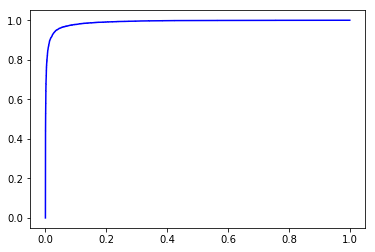

In [28]:
plt.plot(s0fp, s0tp, 'b-')

In [33]:
srfpr = [0] * 4
srtpr = [0] * 4
scfpr = [0] * 4
sctpr = [0] * 4

In [111]:
for idx in range(4):
    srfpr[idx], srtpr[idx], _ = roc_curve(ol, rand_res[idx][1])
    scfpr[idx], sctpr[idx], _ = roc_curve(ol, class_res[idx][1])

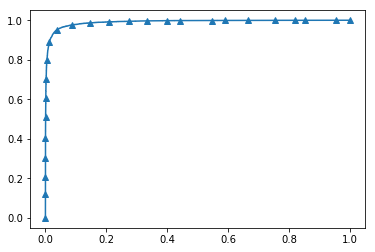

In [64]:
plt.plot(s0fp, s0tp, '^-', markevery=0.05)
plt.savefig("fig/s0.eps", dpi=1200)

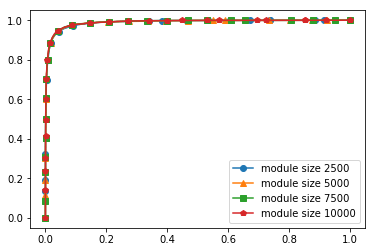

In [114]:
mk = ['o', '^', 's', 'p']
label = ['2500', '5000', '7500', '10000']
for i in range(4):
    plt.plot(srfpr[i], srtpr[i], label="module size " + label[i], marker=mk[i],markevery=0.05)
plt.legend(loc=4)
plt.savefig("../img/sr.eps", dpi=1200)

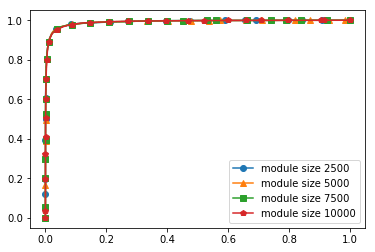

In [115]:
mk = ['o', '^', 's', 'p']
label = ['2500', '5000', '7500', '10000']
for i in range(4):
    plt.plot(scfpr[i], sctpr[i], label="module size " + label[i], marker=mk[i],markevery=0.05)
plt.legend(loc=4)
plt.savefig("../img/sc.eps", dpi=1200)

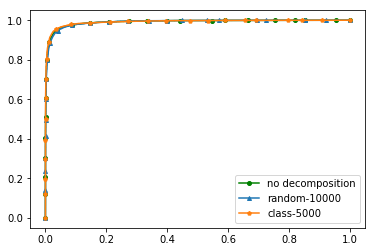

In [119]:
plt.plot(s0fp, s0tp, color='green', ms=4,marker=mk[0], label="no decomposition", markevery=0.05)
plt.plot(srfpr[3], srtpr[3], label="random-10000", ms=4,marker=mk[1], markevery=0.05)
#plt.plot(scfpr[0], sctpr[0], label="class-2500",ms= 4,marker=mk[2], markevery=0.05)
plt.plot(scfpr[0], sctpr[0], label="class-5000",ms= 4,marker=mk[3], markevery=0.05)
plt.legend()
plt.savefig("../img/stotal.eps", dpi=1200)


In [121]:
mlp_rand_res = [readResult("MLPModel-random-{}".format(num)) for num in [2500, 5000, 10000]]
mlp_class_res = [readResult("MLPModel-class-{}".format(num)) for num in [2500, 5000, 10000]]

In [128]:
for rr in mlp_rand_res:
    print(score(ol, rr[0]))

(0.95662414650928917, 0.896442520848728, 0.92808743169398911, 0.91199054932073242)
(0.96014396866564333, 0.91035001073652566, 0.92666666666666664, 0.91843587521663772)
(0.96231408458159107, 0.92034820457018496, 0.92437158469945357, 0.92235550708833147)


In [129]:
for rr in mlp_class_res:
    print(score(ol, rr[0]))

(0.96519875086010687, 0.93610152510297229, 0.91901639344262298, 0.9274802845640544)
(0.96713068332186525, 0.93680954485196644, 0.92677595628415299, 0.93176574002856838)
(0.9661514846768644, 0.93703498056635204, 0.92218579234972675, 0.92955108785458551)


In [137]:
m0pl, m0pv = readResult("MLPModel-random-0")

In [138]:
score(ol, m0pl)

(0.96474884877997147,
 0.93675977653631282,
 0.91628415300546451,
 0.92640883977900557)

In [135]:
mrfpr = [0] * 3
mrtpr = [0] * 3
mcfpr = [0] * 3
mctpr = [0] * 3

In [136]:
for idx in range(3):
    mrfpr[idx], mrtpr[idx], _ = roc_curve(ol, mlp_rand_res[idx][1])
    mcfpr[idx], mctpr[idx], _ = roc_curve(ol, mlp_class_res[idx][1])

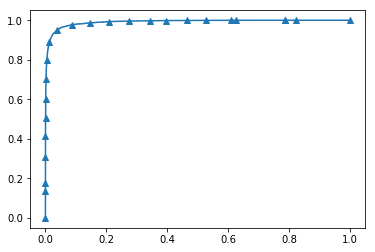

In [139]:
m0fp, m0tp, _ = roc_curve(ol, m0pv)
plt.plot(m0fp, m0tp, '^-', markevery=0.05)
plt.savefig("../img/m0.eps", dpi=1200)

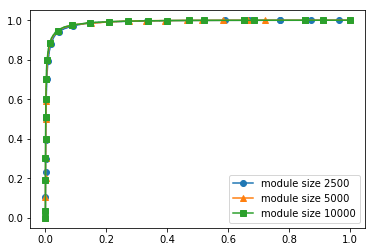

In [140]:
mk = ['o', '^', 's', 'p']
label = ['2500', '5000', '10000']
for i in range(3):
    plt.plot(mrfpr[i], mrtpr[i], label="module size " + label[i], marker=mk[i],markevery=0.05)
plt.legend(loc=4)
plt.savefig("../img/mr.eps", dpi=1200)

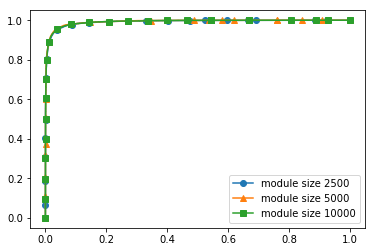

In [141]:
mk = ['o', '^', 's', 'p']
label = ['2500', '5000', '10000']
for i in range(3):
    plt.plot(mcfpr[i], mctpr[i], label="module size " + label[i], marker=mk[i],markevery=0.05)
plt.legend(loc=4)
plt.savefig("../img/mc.eps", dpi=1200)

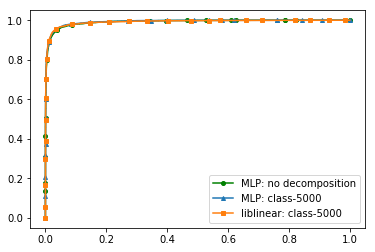

In [142]:
plt.plot(m0fp, m0tp, color='green', ms=4,marker=mk[0], label="MLP: no decomposition", markevery=0.05)
plt.plot(mcfpr[1], mctpr[1], label="MLP: class-5000",ms= 4,marker=mk[1], markevery=0.05)
plt.plot(scfpr[1], sctpr[1], label="liblinear: class-5000",ms= 4,marker=mk[2], markevery=0.05)
plt.legend()
plt.savefig("../img/mtotal.eps", dpi=1200)